1. Sử dụng dữ liệu bán hàng 'supermarket_sales_vn.csv':
Vẽ biểu đồ cột, pie về tần số, tuần suất đơn hàng theo
− Địa phương (HN, SG, ĐN)
− Giới tính

{'Hà Nội': [274, 27.4], 'TP HCM': [490, 49.0], 'Đà Nẵng': [236, 23.6]}
{'Nữ': [501, 50.1], 'Nam': [499, 49.9]}


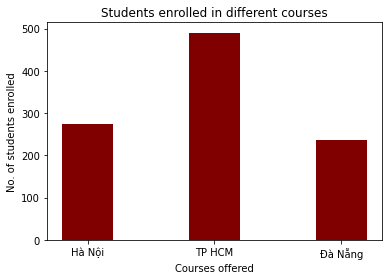

In [23]:
#Check directory
%pwd
#import module
import csv, os
import matplotlib.pyplot as plt
data =[]
with open('B4/data/supermarket_sales_vn.csv', 'r',encoding="utf8") as f:
    fcsv = csv.reader(f)
    next(fcsv)
    for i in fcsv:
        data.append(i)
area = [i[1]for i in data]
sex = [i[3]for i in data]
area_obj = {i: [area.count(i), 100*area.count(i)/len(area)]for i in set(area)}
sex_obj = {i: [sex.count(i), 100*sex.count(i)/len(sex)]for i in set(sex)}
print(area_obj)
print(sex_obj)
#Create fig
fig = plt.figure() 
areas = list(area_obj.keys())
area_tanso = [i[0]for i in list(area_obj.values())]
area_tansuat = [i[1]for i in list(area_obj.values())]
plt.bar(areas, area_tanso, color ='maroon',
        width = 0.4)
 
plt.xlabel("Khu vực")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

    